Train Accuracy: 0.9875
Test Accuracy: 1.0
Train Log Loss: 0.5067355631166206
Test Log Loss: 0.497604173691825


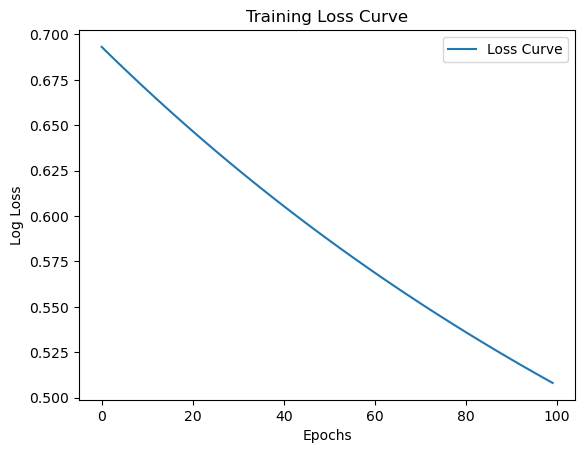

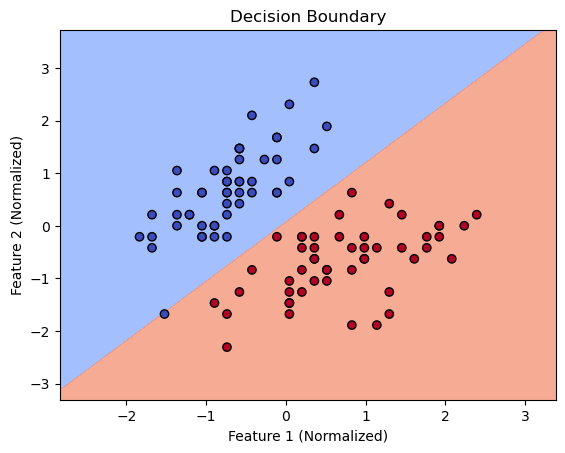

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Use only two classes and two features for simplicity
data = data[data['target'] != 2]
data = data[['sepal length (cm)', 'sepal width (cm)', 'target']]
data['target'] = data['target'].apply(lambda x: 1 if x == 1 else 0)

# Separate features and target
X = data[['sepal length (cm)', 'sepal width (cm)']].values
y = data['target'].values

# Normalize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.losses = []

        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Log loss
            loss = log_loss(y, y_predicted)
            self.losses.append(loss)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Initialize and train the model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=100)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_loss = log_loss(y_train, sigmoid(np.dot(X_train, model.weights) + model.bias))
test_loss = log_loss(y_test, sigmoid(np.dot(X_test, model.weights) + model.bias))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Log Loss: {train_loss}")
print(f"Test Log Loss: {test_loss}")

# Plot the loss curve
plt.plot(range(model.epochs), model.losses, label='Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = sigmoid(np.dot(np.c_[xx1.ravel(), xx2.ravel()], model.weights) + model.bias)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('Decision Boundary')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.show()
